In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Matthew_Normal_0.csv")
df.head()
# plt.plot(df['x-axis'], df['1'])

,Unit,V
0,0.000000,0.469822
1,0.000008,0.470146
2,0.000016,0.469984
3,0.000024,0.469660
4,0.000032,0.469336


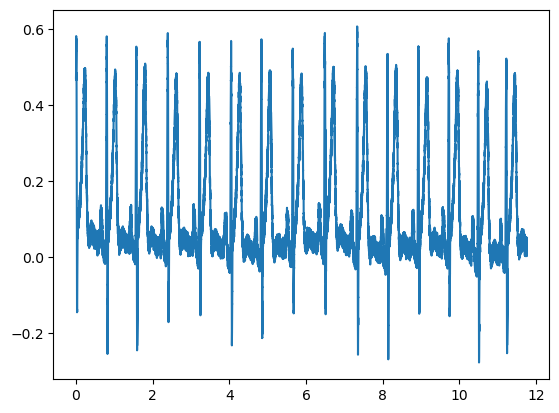

In [5]:
signal = df['V']
plt.plot(df['Unit'], df['V'])
plt.show()

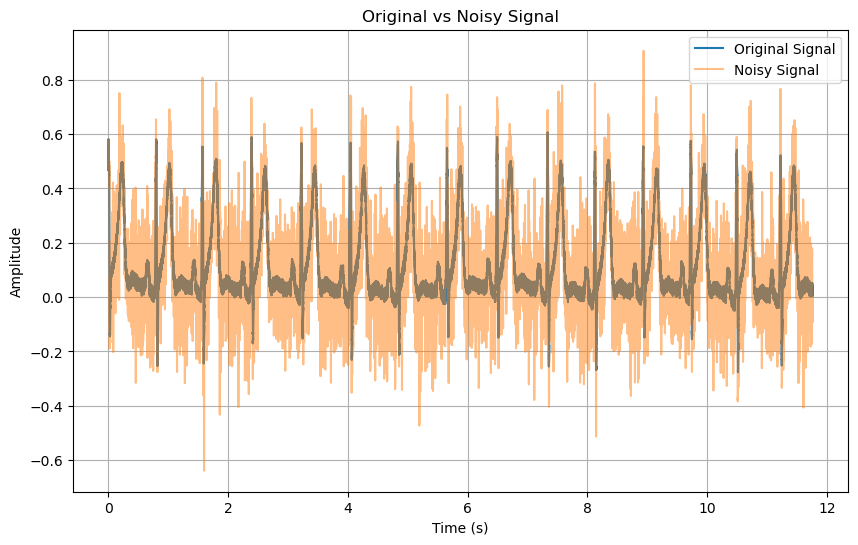

In [19]:
import numpy as np
import scipy

def generate_noisy_signal(signal, fs, time, freq_band, duration):
    # Generate white noise
    noise = np.random.normal(0, 1, len(time))
    
    # Filter the noise to the desired frequency band
    sos = scipy.signal.butter(10, freq_band, 'bandpass', fs=fs, output='sos')
    filtered_noise = scipy.signal.sosfilt(sos, noise)
    
    # Add filtered noise to the signal
    noisy_signal = signal + filtered_noise * 5
    
    return noisy_signal

# Example usage
# Generate a current signal (for example, sinusoidal)
fs = 125000  # Sampling frequency (Hz)
signal = df['V'].to_numpy()
time = df['Unit'].to_numpy()
duration = time[-1] # Duration of the signal in seconds
t = np.arange(0, duration, 1/fs)

# Define the frequency band of the noise
freq_band = [50, 150]  # Desired frequency band of the noise (Hz)

# Generate the noisy signal
noisy_signal = generate_noisy_signal(signal, fs, time, freq_band, duration)

# Plot the original and noisy signals
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(time, signal, label='Original Signal')
plt.plot(time, noisy_signal, label='Noisy Signal', alpha = 0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs Noisy Signal')
plt.legend()
plt.grid(True)
plt.show()
